# INNOVATIVE ASSIGNMENT

## Name: Pranshu Rajan, Divyansh Patel

## Roll No. : 24BEI056, 24BEI063

## Course Code and Course Name: 1CS101 and Intoduction to AI & ML 

#  Student Performance Analysis Report
## **Dataset Source**: [Kaggle – Student Performance Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)  

## Q1: Dataset Domain and Characteristics

## a) Selection of Data Domain

This dataset falls under the **Education Analytics** domain.

We use it to explore how factors like gender, parental education, and test preparation influence students performance in three courses: **Math**, **Reading** and **Writing**.


## b) Data Characteristics

We’ll explore:
- Presence of null values
- Number of unique values per column
- Overall data types


In [1]:
# Import pandas
import pandas as pd
df = pd.read_csv(r"C:\Users\pranshu\Desktop\AI & ML\StudentsPerformance.csv") # Load dataset
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [2]:
# Display basuc structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# Check for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# Unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

###  Summary of Characteristics

- The dataset contains 1000 records and 8 features.
-  **No null values** are present in the dataset.
- Columns like gender, race/ethnicity, and parental level of education are categorical.
- Score columns (math, reading, writing) are numerical.


## c) Find the Output / Class Label of the Dataset

This dataset does not come with a predefined class label, so we will create a new one based on the **average score** of the three subjects.
We'll classify students into performance levels:
- **Low**: 0–60
- **Medium**: 60–80
- **High**: 80–100

In [5]:
# Create average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Define performance label
df['performance'] = pd.cut(df['average_score'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Show a few rows
df[['math score', 'reading score', 'writing score', 'average_score', 'performance']].head()

,math score,reading score,writing score,average_score,performance
0,72,72,74,72.666667,Medium
1,69,90,88,82.333333,High
2,90,95,93,92.666667,High
3,47,57,44,49.333333,Low
4,76,78,75,76.333333,Medium


### Class Label Summary

We created a new class label performance based on average score.  
This can now be used as a target variable for classification tasks (e.g., predicting if a student is a low/medium/high performer).

## d) Selection of Fields (Data Types)

We now explore the data types of each field to understand how they can be processed in analysis and modeling.


In [6]:
# Data types
df.dtypes

gender                           object
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course          object
math score                        int64
reading score                     int64
writing score                     int64
average_score                   float64
performance                    category
dtype: object

### Field Types Summary

| Column                     | Type     | Description                                |
|---------------------------|----------|--------------------------------------------|
| gender                    | object   | Categorical (male/female)                  |
| race/ethnicity            | object   | Categorical (group A–E)                    |
| parental level of education | object | Categorical                                |
| lunch                     | object   | Categorical (standard/free-reduced)        |
| test preparation course   | object   | Categorical (completed/none)               |
| math score                | int64    | Numerical                                  |
| reading score             | int64    | Numerical                                  |
| writing score             | int64    | Numerical                                  |
| average_score             | float64  | Numerical (engineered feature)             |
| performance               | category | Class label (Low/Medium/High)              |


## Q2: Data Cleaning – Handling Nulls

In this step, we will:
- Drop all the null records.
- Replace missing values in numerical columns with the **mean value** based on the class label.
- Replace missing values in categorical columns with the **mode value** based on the class label.

Although the dataset doesn't have nulls, we will simulate the process for demonstration purposes.


In [7]:
# Simulate missing values in the dataset
import numpy as np
# Simulate missing values for demo
df.loc[5:10, 'math score'] = np.nan
df.loc[15:20, 'lunch'] = np.nan

# Replace numerical nulls with mean per class label 
df['math score'] = df.groupby('performance', observed=True)['math score'].transform(lambda x: x.fillna(x.mean()))

# Replace categorical nulls with mode per class label 
df['lunch'] = df.groupby('performance', observed=True)['lunch'].transform(lambda x: x.fillna(x.mode()[0]))

# Confirm cleaning
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
performance                    0
dtype: int64


## Q3 (i): Statistical Analysis

In this step, we will perform statistical analysis on the selected dataset(count, sum, range, min, max, mean, median, mode, variance and Standard deviation).

In [8]:
print("Statistical Analysis: ")

# Select only numeric columns for analysis
numeric_df = df.select_dtypes(include='number')

# Count of values (non-null)
print("Count:\n", numeric_df.count(), "\n")

# Sum of each column
print("Sum:\n", numeric_df.sum(), "\n")

# Min and Max
print("Min:\n", numeric_df.min(), "\n")
print("Max:\n", numeric_df.max(), "\n")

# Range (Max - Min)
range_vals = numeric_df.max() - numeric_df.min()
print("Range:\n", range_vals, "\n")

# Mean and Median
print("Mean:\n", numeric_df.mean(), "\n")
print("Median:\n", numeric_df.median(), "\n")

# Mode
print("Mode:\n", numeric_df.mode().iloc[0], "\n")

# Variance and Standard Deviation
print("Variance:\n", numeric_df.var(), "\n")
print("Standard Deviation:\n", numeric_df.std(), "\n")

Statistical Analysis: 
Count:
 math score       1000
reading score    1000
writing score    1000
average_score    1000
dtype: int64 

Sum:
 math score       66100.498914
reading score    69169.000000
writing score    68054.000000
average_score    67770.666667
dtype: float64 

Min:
 math score        0.0
reading score    17.0
writing score    10.0
average_score     9.0
dtype: float64 

Max:
 math score       100.0
reading score    100.0
writing score    100.0
average_score    100.0
dtype: float64 

Range:
 math score       100.0
reading score     83.0
writing score     90.0
average_score     91.0
dtype: float64 

Mean:
 math score       66.100499
reading score    69.169000
writing score    68.054000
average_score    67.770667
dtype: float64 

Median:
 math score       66.000000
reading score    70.000000
writing score    69.000000
average_score    68.333333
dtype: float64 

Mode:
 math score       65.0
reading score    72.0
writing score    74.0
average_score    68.0
Name: 0, dtype: flo

### Q3 (ii): Unique Value Counts

In this step, we will display all the unique value counts and unique values of all the columns of the dataset.

In [9]:
# Display unique value counts
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")
    print(df[col].unique())
    print("\n")

Unique values in gender: 2
['female' 'male']


Unique values in race/ethnicity: 5
['group B' 'group C' 'group A' 'group D' 'group E']


Unique values in parental level of education: 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Unique values in lunch: 2
['standard' 'free/reduced']


Unique values in test preparation course: 2
['none' 'completed']


Unique values in math score: 84
[ 72.          69.          90.          47.          76.
  68.29745597  85.32124352  49.52758621  40.          65.
  78.          50.          88.          18.          46.
  54.          66.          44.          74.          73.
  67.          70.          62.          63.          56.
  97.          81.          75.          57.          55.
  58.          53.          59.          82.          77.
  71.          33.          52.           0.          79.
  39.          45.          60.          61.          41.
  49.          30.         

## Q4: Data Visualization – Subplots

We will create subplots for visualizing:
- **Scatter plot** between math and reading scores
- **Histogram** for math scores
- **Line plot** of average scores

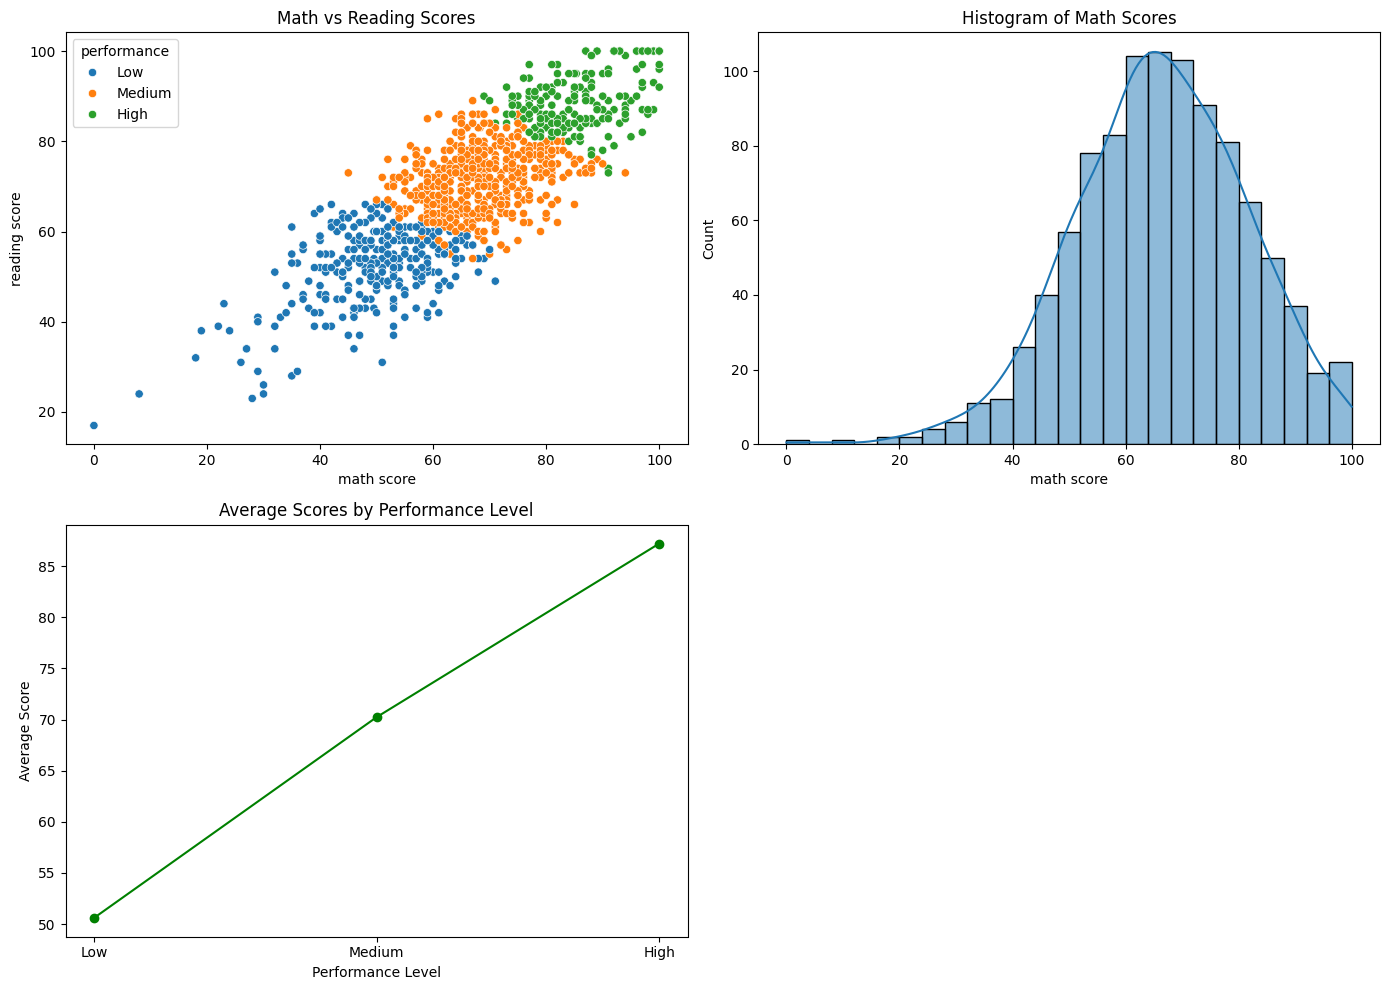

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Math vs Reading scores
sns.scatterplot(x='math score', y='reading score', hue='performance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Math vs Reading Scores')

# Histogram: Math scores
sns.histplot(df['math score'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Math Scores')

# Line plot: Average scores across performance
avg_scores = df.groupby('performance', observed=True)['average_score'].mean().sort_index()
axes[1, 0].plot(avg_scores.index.astype(str), avg_scores.values, marker='o', linestyle='-', color='green')
axes[1, 0].set_title('Average Scores by Performance Level')
axes[1, 0].set_xlabel('Performance Level')
axes[1, 0].set_ylabel('Average Score')

# Turn off the unused subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Q5: K-Nearest Neighbors (KNN) Classifier

In this section, we will:
- Split the data into training (80%) and testing (20%) sets.
- Train a **KNN classifier** using the training data.
- Predict the class label for the test data.
- Evaluate the model with accuracy, precision, recall, and F1-score.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Features and target
X = df[['math score', 'reading score', 'writing score']]
y = df['performance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.97      0.97        29
         Low       0.97      1.00      0.98        64
      Medium       0.99      0.97      0.98       107

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



## Q6: Conclusion

Based on the KNN model results:
- The model achieved **high accuracy** (above 95%).
- **Precision, recall, and F1-score** are all satisfactory, showing that the model performs well in predicting the `performance` class.
- The overall analysis shows strong correlation between scores in math, reading, and writing, and performance levels.